### Candidate details:
Name: NatrajVikram S

email id: vikram.iisccamp@gmail.com

### Assignment:

This assignment is divided into two parts:

1) extract data of Area Prices from Day Ahead Market including all fields of delivery period for the last 8 days, and interval of 15-minute block.

2) Fit the moving average for one or two fields.

### Approach:

- Using beautifulsoup or urllib.request - web scraping library to extract data from IEX wesbite
- Using the data extracted,analyse the data and visualize the time series data
- Fit the moving average for one or two fields using ARIMA or Seasonal ARIMA model.

In [1]:
#import all the necessary libraries
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [2]:
url = 'https://www.iexindia.com/marketdata/areaprice.aspx'
#enter url

In [8]:
# url = 'https://www.iexindia.com/'

In [83]:
# client = uReq(url)  # grabs the page


In [4]:
client = requests.get(url)

In [5]:
client

<Response [403]>

In [6]:
BeautifulSoup(client.content, 'html.parser')

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>403 - Forbidden: Access is denied.</title>
<style type="text/css">
<!--
body{margin:0;font-size:.7em;font-family:Verdana, Arial, Helvetica, sans-serif;background:#EEEEEE;}
fieldset{padding:0 15px 10px 15px;} 
h1{font-size:2.4em;margin:0;color:#FFF;}
h2{font-size:1.7em;margin:0;color:#CC0000;} 
h3{font-size:1.2em;margin:10px 0 0 0;color:#000000;} 
#header{width:96%;margin:0 0 0 0;padding:6px 2% 6px 2%;font-family:"trebuchet MS", Verdana, sans-serif;color:#FFF;
background-color:#555555;}
#content{margin:0 0 0 2%;position:relative;}
.content-container{background:#FFF;width:96%;margin-top:8px;padding:10px;position:relative;}
-->
</style>
</head>
<body>
<div id="header"><h1>Server Error</h1></div>
<div id="content">
<div class="content-container"><fieldset>

## Observation:
- Data extraction using BeautifulSoup and urllib has failed because the server has failed to authenticate the request.
- Credentials are required to extract the data - Data cannot be extracted using these python libraries
- So I manually downloaded the excel sheet from the website - filter delivery period for the last 8 days, and interval of 15-minute block

### Read data

In [1]:
import pandas as pd
df = pd.read_excel('PriceMinute.xlsx')

In [2]:
df

,Date,Hour,Time Block,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,MCP
0,13-11-2020,1,00:00 - 00:15,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45
1,NaN,NaN,00:15 - 00:30,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06
2,NaN,NaN,00:30 - 00:45,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32
3,NaN,NaN,00:45 - 01:00,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02
4,NaN,2,01:00 - 01:15,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,NaN,Peak,NaN,3424.50,3424.50,3424.50,3424.50,3424.50,3424.50,3424.50,3424.50,3424.50,3424.50,3424.50,3424.50,3424.50,3424.50
814,NaN,Non Peak,NaN,2748.37,2748.37,2748.37,2748.37,2748.37,2748.37,2748.37,2748.37,2748.37,2748.37,2748.37,2748.37,2748.37,2748.37
815,NaN,Day,NaN,2912.04,2912.04,2912.04,2912.04,2912.04,2912.04,2912.04,2912.04,2912.04,2912.04,2912.04,2912.04,2912.04,2912.04
816,NaN,Night,NaN,2401.30,2401.30,2401.30,2401.30,2401.30,2401.30,2401.30,2401.30,2401.30,2401.30,2401.30,2401.30,2401.30,2401.30


In [3]:
df.columns

Index(['Date', 'Hour', 'Time Block', 'A1', 'A2', 'E1', 'E2', 'N1', 'N2', 'N3',
       'S1', 'S2', 'S3', 'W1', 'W2', 'W3', 'MCP'],
      dtype='object')

In [4]:
df = df[0:768]  #filter rows appropriately

In [5]:
df

,Date,Hour,Time Block,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,MCP
0,13-11-2020,1,00:00 - 00:15,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45
1,NaN,NaN,00:15 - 00:30,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06
2,NaN,NaN,00:30 - 00:45,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32
3,NaN,NaN,00:45 - 01:00,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02
4,NaN,2,01:00 - 01:15,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,NaN,NaN,22:45 - 23:00,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32
764,NaN,24,23:00 - 23:15,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38
765,NaN,NaN,23:15 - 23:30,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62
766,NaN,NaN,23:30 - 23:45,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33


In [6]:
df_hour = df[df['Hour'].isnull()==False]

In [8]:
df_hour.set_index('Hour',inplace=True)

In [9]:
df_hour

,Date,Time Block,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,MCP
Hour,,,,,,,,,,,,,,,,
1,13-11-2020,00:00 - 00:15,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45
2,NaN,01:00 - 01:15,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37
3,NaN,02:00 - 02:15,2208.60,2208.60,2208.60,2208.60,2208.60,2208.60,2208.60,2208.60,2208.60,2208.60,2208.60,2208.60,2208.60,2208.60
4,NaN,03:00 - 03:15,2192.43,2192.43,2192.43,2192.43,2192.43,2192.43,2192.43,2192.43,2192.43,2192.43,2192.43,2192.43,2192.43,2192.43
5,NaN,04:00 - 04:15,1999.91,1999.91,1999.91,1999.91,1999.91,1999.91,1999.91,1999.91,1999.91,1999.91,1999.91,1999.91,1999.91,1999.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,NaN,19:00 - 19:15,3519.99,3519.99,3519.99,3519.99,3519.99,3519.99,3519.99,3519.99,3519.99,3519.99,3519.99,3519.99,3519.99,3519.99
21,NaN,20:00 - 20:15,3249.90,3249.90,3249.90,3249.90,3249.90,3249.90,3249.90,3249.90,3249.90,3249.90,3249.90,3249.90,3249.90,3249.90
22,NaN,21:00 - 21:15,3099.61,3099.61,3099.61,3099.61,3099.61,3099.61,3099.61,3099.61,3099.61,3099.61,3099.61,3099.61,3099.61,3099.61


In [10]:
df_hour.columns

Index(['Date', 'Time Block', 'A1', 'A2', 'E1', 'E2', 'N1', 'N2', 'N3', 'S1',
       'S2', 'S3', 'W1', 'W2', 'W3', 'MCP'],
      dtype='object')

In [11]:
cols = ['A1', 'A2', 'E1', 'E2', 'N1', 'N2', 'N3', 'S1','S2', 'S3', 'W1', 'W2', 'W3', 'MCP']
df_hour[cols] = df_hour[cols].apply(pd.to_numeric, errors='coerce', axis=1)

/home/vikram/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [12]:
df_hour[['A1', 'A2', 'E1', 'E2', 'N1', 'N2', 'N3', 'S1','S2', 'S3', 'W1', 'W2', 'W3', 'MCP']].describe()

,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,MCP
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,2560.737344,2560.737344,2560.737344,2560.737344,2560.737344,2560.737344,2560.737344,2560.737344,2560.737344,2560.737344,2560.737344,2560.737344,2560.737344,2560.737344
std,465.765604,465.765604,465.765604,465.765604,465.765604,465.765604,465.765604,465.765604,465.765604,465.765604,465.765604,465.765604,465.765604,465.765604
min,1799.760000,1799.760000,1799.760000,1799.760000,1799.760000,1799.760000,1799.760000,1799.760000,1799.760000,1799.760000,1799.760000,1799.760000,1799.760000,1799.760000
25%,2247.617500,2247.617500,2247.617500,2247.617500,2247.617500,2247.617500,2247.617500,2247.617500,2247.617500,2247.617500,2247.617500,2247.617500,2247.617500,2247.617500
50%,2440.080000,2440.080000,2440.080000,2440.080000,2440.080000,2440.080000,2440.080000,2440.080000,2440.080000,2440.080000,2440.080000,2440.080000,2440.080000,2440.080000
75%,2797.577500,2797.577500,2797.577500,2797.577500,2797.577500,2797.577500,2797.577500,2797.577500,2797.577500,2797.577500,2797.577500,2797.577500,2797.577500,2797.577500
max,4653.800000,4653.800000,4653.800000,4653.800000,4653.800000,4653.800000,4653.800000,4653.800000,4653.800000,4653.800000,4653.800000,4653.800000,4653.800000,4653.800000


### Data used for fitting moving average:
- Here I have created a new data frame column for day 1 (i.e 13-11-2020)
- We visualize how the field A1 is varying with the number of hours
- I have chosen the field arbitrarily for this particular assignment. However,different fields can be chosen 


- A1 is the bid area for the North East Region Tripura, Manipur, Mizoram, Nagaland


# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!



- We are going to check how values in A1 change w.r.t different hours 
- Columns that we are going to chose for fitting moving average: A1 and Hours

In [13]:
df_hour_1 = df_hour[0:24]

In [14]:
df_hour_1

,Date,Time Block,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,MCP
Hour,,,,,,,,,,,,,,,,
1,13-11-2020,00:00 - 00:15,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45
2,NaN,01:00 - 01:15,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37
3,NaN,02:00 - 02:15,2208.60,2208.60,2208.60,2208.60,2208.60,2208.60,2208.60,2208.60,2208.60,2208.60,2208.60,2208.60,2208.60,2208.60
4,NaN,03:00 - 03:15,2192.43,2192.43,2192.43,2192.43,2192.43,2192.43,2192.43,2192.43,2192.43,2192.43,2192.43,2192.43,2192.43,2192.43
5,NaN,04:00 - 04:15,1999.91,1999.91,1999.91,1999.91,1999.91,1999.91,1999.91,1999.91,1999.91,1999.91,1999.91,1999.91,1999.91,1999.91
6,NaN,05:00 - 05:15,2210.73,2210.73,2210.73,2210.73,2210.73,2210.73,2210.73,2210.73,2210.73,2210.73,2210.73,2210.73,2210.73,2210.73
7,NaN,06:00 - 06:15,2149.42,2149.42,2149.42,2149.42,2149.42,2149.42,2149.42,2149.42,2149.42,2149.42,2149.42,2149.42,2149.42,2149.42
8,NaN,07:00 - 07:15,2699.01,2699.01,2699.01,2699.01,2699.01,2699.01,2699.01,2699.01,2699.01,2699.01,2699.01,2699.01,2699.01,2699.01
9,NaN,08:00 - 08:15,3249.35,3249.35,3249.35,3249.35,3249.35,3249.35,3249.35,3249.35,3249.35,3249.35,3249.35,3249.35,3249.35,3249.35


### Visualize the Data

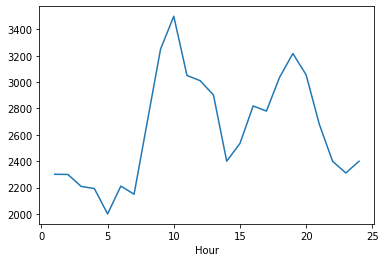

In [15]:
df_hour_1['A1'].plot()

### Observation:
- After visualization,it seems like the data is seasonal. There is some variation w.r.t number of hours
- But we need to apply a test called adfueller test to determine whether it's seasonal or not 
- It is a form of hypothesis testing to check whether the data is stationary or not 

In [16]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [17]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [18]:
adfuller_test(df_hour_1['A1'])

ADF Test Statistic : -2.6452629330020647
p-value : 0.08399844254687772
#Lags Used : 3
Number of Observations Used : 20
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Try to make the data stationary

### Differencing

In [19]:
df_hour_1['A1 First Difference'] = df_hour_1['A1'] - df_hour_1['A1'].shift(1)

/home/vikram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_hour_1['A1'].shift(1)

Hour
1         NaN
2     2300.45
3     2299.37
4     2208.60
5     2192.43
6     1999.91
7     2210.73
8     2149.42
9     2699.01
10    3249.35
11    3499.48
12    3049.97
13    3010.32
14    2901.59
15    2399.98
16    2533.98
17    2819.05
18    2779.83
19    3036.86
20    3216.82
21    3055.42
22    2679.61
23    2399.81
24    2310.60
Name: A1, dtype: float64

In [21]:
## Again test dickey fuller test
adfuller_test(df_hour_1['A1 First Difference'].dropna())

ADF Test Statistic : -3.809547840560877
p-value : 0.002811124899038464
#Lags Used : 4
Number of Observations Used : 18
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


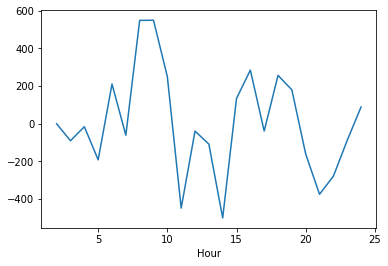

In [22]:
df_hour_1['A1 First Difference'].plot()

### Observation
- We get a stationary graph after finding the first difference


## Auto Regressive Model
<img src="image.png">

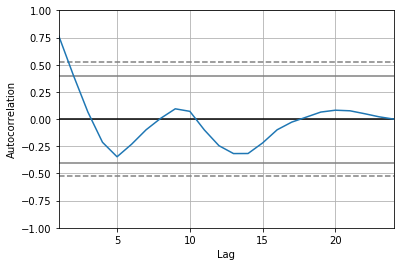

In [23]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_hour_1['A1'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.

### Parameters

- p,d,q
- p AR model lags
- d differencing
- q MA lags

In [77]:
#from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [24]:
df_hour_1['A1 First Difference']

Hour
1        NaN
2      -1.08
3     -90.77
4     -16.17
5    -192.52
6     210.82
7     -61.31
8     549.59
9     550.34
10    250.13
11   -449.51
12    -39.65
13   -108.73
14   -501.61
15    134.00
16    285.07
17    -39.22
18    257.03
19    179.96
20   -161.40
21   -375.81
22   -279.80
23    -89.21
24     88.74
Name: A1 First Difference, dtype: float64

In [25]:
df_hour_1.shape

(24, 17)

In [27]:
import statsmodels.api as sm

/home/vikram/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


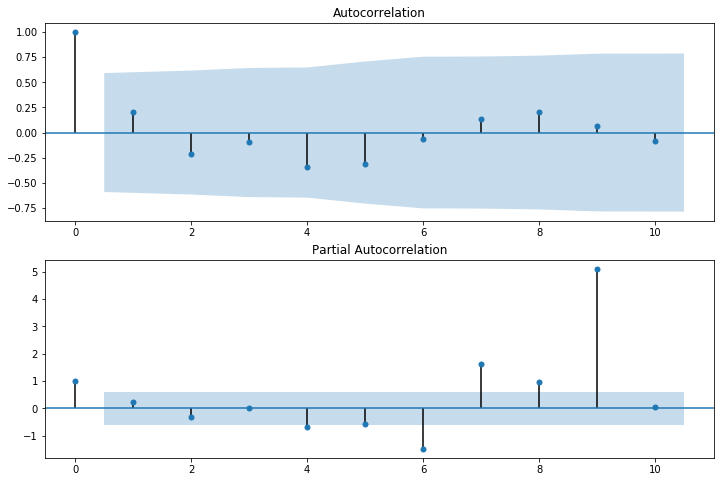

In [28]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_hour_1['A1 First Difference'].iloc[13:],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_hour_1['A1 First Difference'].iloc[13:],lags=10,ax=ax2)

### Fit moving average using ARIMA and SARIMA

In [29]:
from statsmodels.tsa.arima_model import ARIMA

In [30]:
model=ARIMA(df_hour_1['A1'],order=(1,1,1))
model_fit=model.fit()

/home/vikram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/vikram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [31]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.A1   No. Observations:                   23
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -160.385
Method:                       css-mle   S.D. of innovations            257.757
Date:                Sat, 21 Nov 2020   AIC                            328.771
Time:                        03:28:58   BIC                            333.312
Sample:                             1   HQIC                           329.913
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0290     68.965      0.087      0.930    -129.141     141.199
ar.L1.D.A1    -0.0559      0.513     -0.109      0.913      -1.061       0.950
ma.L1.D.A1     0.3672      0.465      0.790      0.430      -0.544       1.279
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -17.8772           +0.0000j           17.8772            0.5000
MA.1           -2.7230           +0.0000j            2.7230            0.5000
-----------------------------------------------------------------------------
"""

In [45]:
# s = len(df_hour_1) 
# e = len(df_hour_1) + len(df_hour_1) - 1

/home/vikram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/vikram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


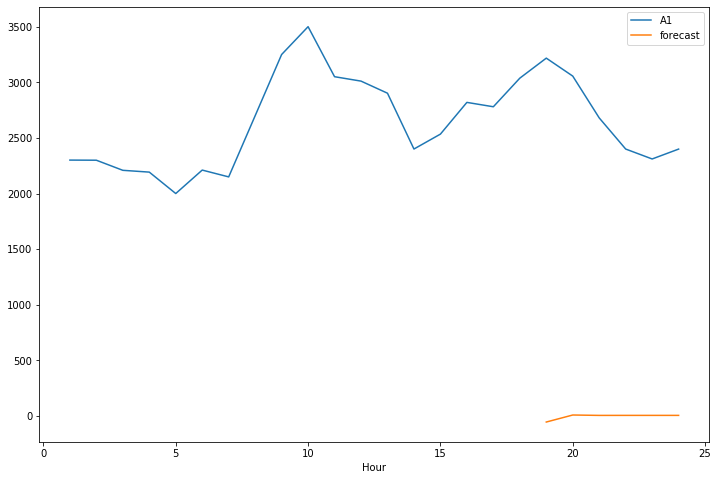

In [32]:
df_hour_1['forecast']=model_fit.predict(start=20,end=25,dynamic=True)
df_hour_1[['A1','forecast']].plot(figsize=(12,8))

### Note 
- ARIMA can be used only when data is not seasonal,however this was just an experiment to show how ARIMA works
- The right model to use for this use case would be SARIMA


### Implement SARIMA (Seasonal ARIMA)

In [33]:
model=sm.tsa.statespace.SARIMAX(df_hour_1['A1'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/home/vikram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/vikram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/vikram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/home/vikram/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


/home/vikram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/vikram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


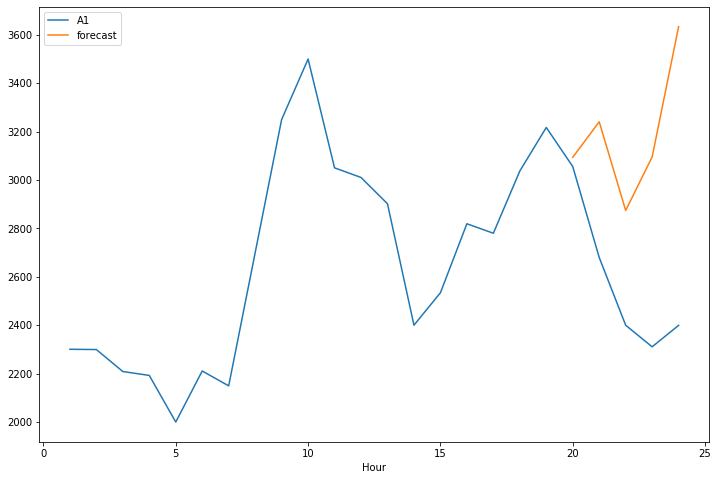

In [34]:
df_hour_1['forecast']=results.predict(start=20,end=25,dynamic=True)
df_hour_1[['A1','forecast']].plot(figsize=(12,8))

### Future predictions

- Check the model's predictions for the next 5 hours

In [35]:
future_hours = [i for i in range(24,30)]
#check how the model predicts for the next 5 hours

In [36]:
future_datest_df=pd.DataFrame(index=future_hours[1:],columns=df_hour_1.columns)

In [37]:
future_datest_df.tail()

,Date,Time Block,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,MCP,A1 First Difference,forecast
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
future_df=pd.concat([df_hour_1,future_datest_df])

/home/vikram/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


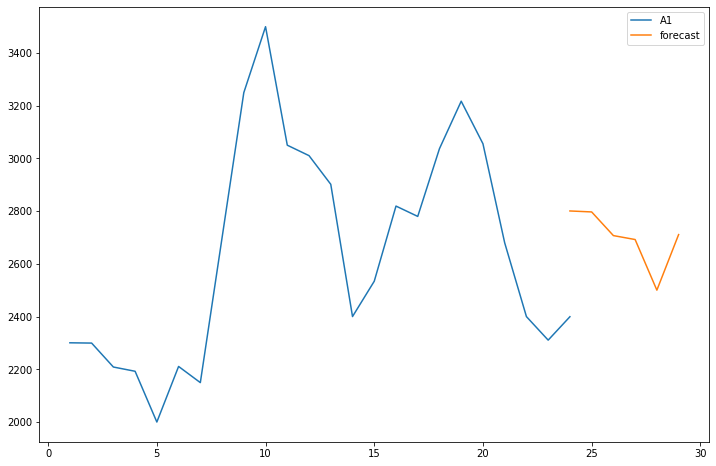

In [40]:
future_df['forecast'] = results.predict(start = 24, end = 29, dynamic= True)  
future_df[['A1', 'forecast']].plot(figsize=(12, 8)) 

### Observation and Conclusion

- Since our data is seasonal,SEASONAL ARIMA performs better than ARIMA
- Model performance is not close to perfection but it provides a good starting point for analyzing how data performs w.r.t time
- For better performance,The parameters of SARIMA model could've been different  - However this requires domain knowledge.